#### Import dependencies 

In [1]:
# !pip install -q tensorflow==2.0.0-alpha0
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import numpy as np
import tensorflow as tf

params = {'legend.fontsize': 'x-large',
          'axes.labelsize': 'x-large',
          'axes.titlesize': 'x-large',
          'xtick.labelsize': 'x-large',
          'ytick.labelsize': 'x-large'}
pylab.rcParams.update(params)
plt.style.use('ggplot')

np.random.seed(42)
# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)

In [2]:
print(tf.__version__)

2.0.0-alpha0


#### Read data 

In [3]:
X_file_path = r'data/X_train.csv'
y_file_path = r'data/y_train.csv'

In [4]:
X = pd.read_csv(X_file_path, sep=' ', header=None, lineterminator="\n").values
y = pd.read_csv(y_file_path, sep=' ', header=None, lineterminator="\n").values

In [5]:
print(X.shape)
print(y.shape)

(7767, 561)
(7767, 1)


#### Preprocess

In [6]:
# y = tf.keras.utils.to_categorical(y)[:,1:]

In [7]:
# Classes must start from 0
y -= 1

##### Shuffle data and split to train and test 

In [8]:
num_total_data = X.shape[0]
indices = np.random.permutation(num_total_data)
test_size = num_total_data // 10
training_idx, test_idx = indices[test_size:], indices[:test_size]
X_train, y_train = X[training_idx, :], y[training_idx, :]
X_test, y_test = X[test_idx, :], y[test_idx, :]

In [9]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(6991, 561) (6991, 1)
(776, 561) (776, 1)


##### Convert to tf.data.Dataset  

In [10]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))

In [11]:
BATCH_SIZE = 64
SHUFFLE_BUFFER_SIZE = 100

train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

#### Model

In [12]:
input_shape = (561,)

In [13]:
input_shape = X_train[0].shape
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(8, activation='relu', input_shape=input_shape),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(12, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.RMSprop(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

In [14]:
model.build()

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 4496      
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 7

In [16]:
epochs_options = [10, 100, 200, 300, 400]

In [17]:
train_evals = []
test_evals = []
for epochs in epochs_options:
    model.fit(train_dataset, epochs=epochs)
    train_evals.append(model.evaluate(train_dataset))
    test_evals.append(model.evaluate(test_dataset))

Epoch 1/10
110/110 [==============================] - 1s 13ms/step - loss: 1.8858 - sparse_categorical_accuracy: 0.1909
Epoch 2/10
110/110 [==============================] - 0s 3ms/step - loss: 1.2746 - sparse_categorical_accuracy: 0.4889
Epoch 3/10
110/110 [==============================] - 0s 3ms/step - loss: 0.9170 - sparse_categorical_accuracy: 0.6992
Epoch 4/10
110/110 [==============================] - 0s 3ms/step - loss: 0.7393 - sparse_categorical_accuracy: 0.7641
Epoch 5/10
110/110 [==============================] - 0s 3ms/step - loss: 0.6396 - sparse_categorical_accuracy: 0.7896
Epoch 6/10
110/110 [==============================] - 0s 3ms/step - loss: 0.5681 - sparse_categorical_accuracy: 0.8032
Epoch 7/10
110/110 [==============================] - 0s 3ms/step - loss: 0.5060 - sparse_categorical_accuracy: 0.8213
Epoch 8/10
110/110 [==============================] - 0s 3ms/step - loss: 0.4557 - sparse_categorical_accuracy: 0.8397
Epoch 9/10
110/110 [===========================

110/110 [==============================] - 0s 3ms/step - loss: 0.1182 - sparse_categorical_accuracy: 0.9542
Epoch 58/100
110/110 [==============================] - 0s 3ms/step - loss: 0.1146 - sparse_categorical_accuracy: 0.9562
Epoch 59/100
110/110 [==============================] - 0s 3ms/step - loss: 0.1142 - sparse_categorical_accuracy: 0.9564
Epoch 60/100
110/110 [==============================] - 0s 3ms/step - loss: 0.1079 - sparse_categorical_accuracy: 0.9582
Epoch 61/100
110/110 [==============================] - 0s 3ms/step - loss: 0.1161 - sparse_categorical_accuracy: 0.9557
Epoch 62/100
110/110 [==============================] - 0s 3ms/step - loss: 0.1168 - sparse_categorical_accuracy: 0.9592
Epoch 63/100
110/110 [==============================] - 0s 3ms/step - loss: 0.1163 - sparse_categorical_accuracy: 0.9598
Epoch 64/100
110/110 [==============================] - 0s 3ms/step - loss: 0.1160 - sparse_categorical_accuracy: 0.9575
Epoch 65/100
110/110 [=======================

110/110 [==============================] - 0s 3ms/step - loss: 0.0840 - sparse_categorical_accuracy: 0.9680
Epoch 24/200
110/110 [==============================] - 0s 3ms/step - loss: 0.0797 - sparse_categorical_accuracy: 0.9724
Epoch 25/200
110/110 [==============================] - 0s 3ms/step - loss: 0.0800 - sparse_categorical_accuracy: 0.9715
Epoch 26/200
110/110 [==============================] - 0s 3ms/step - loss: 0.0802 - sparse_categorical_accuracy: 0.9714
Epoch 27/200
110/110 [==============================] - 0s 3ms/step - loss: 0.0785 - sparse_categorical_accuracy: 0.9734
Epoch 28/200
110/110 [==============================] - 0s 3ms/step - loss: 0.0787 - sparse_categorical_accuracy: 0.9731
Epoch 29/200
110/110 [==============================] - 0s 4ms/step - loss: 0.0766 - sparse_categorical_accuracy: 0.9737
Epoch 30/200
110/110 [==============================] - 0s 3ms/step - loss: 0.0795 - sparse_categorical_accuracy: 0.9727
Epoch 31/200
110/110 [=======================

110/110 [==============================] - 0s 3ms/step - loss: 0.0648 - sparse_categorical_accuracy: 0.9795
Epoch 91/200
110/110 [==============================] - 0s 3ms/step - loss: 0.0699 - sparse_categorical_accuracy: 0.9767
Epoch 92/200
110/110 [==============================] - 0s 3ms/step - loss: 0.0623 - sparse_categorical_accuracy: 0.9803
Epoch 93/200
110/110 [==============================] - 0s 2ms/step - loss: 0.0607 - sparse_categorical_accuracy: 0.9803
Epoch 94/200
110/110 [==============================] - 0s 3ms/step - loss: 0.0600 - sparse_categorical_accuracy: 0.9808
Epoch 95/200
110/110 [==============================] - 0s 3ms/step - loss: 0.0679 - sparse_categorical_accuracy: 0.9780
Epoch 96/200
110/110 [==============================] - 0s 3ms/step - loss: 0.0636 - sparse_categorical_accuracy: 0.9795
Epoch 97/200
110/110 [==============================] - 0s 3ms/step - loss: 0.0653 - sparse_categorical_accuracy: 0.9790
Epoch 98/200
110/110 [=======================

110/110 [==============================] - 0s 3ms/step - loss: 0.0577 - sparse_categorical_accuracy: 0.9821
Epoch 158/200
110/110 [==============================] - 0s 2ms/step - loss: 0.0529 - sparse_categorical_accuracy: 0.9823
Epoch 159/200
110/110 [==============================] - 0s 3ms/step - loss: 0.0569 - sparse_categorical_accuracy: 0.9828
Epoch 160/200
110/110 [==============================] - 0s 3ms/step - loss: 0.0582 - sparse_categorical_accuracy: 0.9807
Epoch 161/200
110/110 [==============================] - 0s 3ms/step - loss: 0.0510 - sparse_categorical_accuracy: 0.9843
Epoch 162/200
110/110 [==============================] - 0s 2ms/step - loss: 0.0540 - sparse_categorical_accuracy: 0.9843
Epoch 163/200
110/110 [==============================] - 0s 3ms/step - loss: 0.0640 - sparse_categorical_accuracy: 0.9814
Epoch 164/200
110/110 [==============================] - 0s 2ms/step - loss: 0.0495 - sparse_categorical_accuracy: 0.9851
Epoch 165/200
110/110 [===============

110/110 [==============================] - 0s 3ms/step - loss: 0.0530 - sparse_categorical_accuracy: 0.9820
Epoch 23/300
110/110 [==============================] - 0s 3ms/step - loss: 0.0546 - sparse_categorical_accuracy: 0.9823
Epoch 24/300
110/110 [==============================] - 0s 2ms/step - loss: 0.0508 - sparse_categorical_accuracy: 0.9841
Epoch 25/300
110/110 [==============================] - 0s 3ms/step - loss: 0.0467 - sparse_categorical_accuracy: 0.9853
Epoch 26/300
110/110 [==============================] - 0s 3ms/step - loss: 0.0489 - sparse_categorical_accuracy: 0.9841
Epoch 27/300
110/110 [==============================] - 0s 2ms/step - loss: 0.0474 - sparse_categorical_accuracy: 0.9848
Epoch 28/300
110/110 [==============================] - 0s 2ms/step - loss: 0.0505 - sparse_categorical_accuracy: 0.9833
Epoch 29/300
110/110 [==============================] - 0s 3ms/step - loss: 0.0513 - sparse_categorical_accuracy: 0.9834
Epoch 30/300
110/110 [=======================

110/110 [==============================] - 0s 3ms/step - loss: 0.0461 - sparse_categorical_accuracy: 0.9864
Epoch 90/300
110/110 [==============================] - 0s 3ms/step - loss: 0.0411 - sparse_categorical_accuracy: 0.9870
Epoch 91/300
110/110 [==============================] - 0s 3ms/step - loss: 0.0508 - sparse_categorical_accuracy: 0.9858
Epoch 92/300
110/110 [==============================] - 0s 3ms/step - loss: 0.0523 - sparse_categorical_accuracy: 0.9858
Epoch 93/300
110/110 [==============================] - 0s 2ms/step - loss: 0.0445 - sparse_categorical_accuracy: 0.9873
Epoch 94/300
110/110 [==============================] - 0s 3ms/step - loss: 0.0381 - sparse_categorical_accuracy: 0.9883
Epoch 95/300
110/110 [==============================] - 0s 2ms/step - loss: 0.0440 - sparse_categorical_accuracy: 0.9870
Epoch 96/300
110/110 [==============================] - 0s 2ms/step - loss: 0.0477 - sparse_categorical_accuracy: 0.9847
Epoch 97/300
110/110 [=======================

110/110 [==============================] - 0s 3ms/step - loss: 0.0401 - sparse_categorical_accuracy: 0.9880
Epoch 157/300
110/110 [==============================] - 0s 3ms/step - loss: 0.0430 - sparse_categorical_accuracy: 0.9876
Epoch 158/300
110/110 [==============================] - 0s 3ms/step - loss: 0.0416 - sparse_categorical_accuracy: 0.9884
Epoch 159/300
110/110 [==============================] - 0s 3ms/step - loss: 0.0519 - sparse_categorical_accuracy: 0.9856
Epoch 160/300
110/110 [==============================] - 0s 3ms/step - loss: 0.0362 - sparse_categorical_accuracy: 0.9898
Epoch 161/300
110/110 [==============================] - 0s 3ms/step - loss: 0.0327 - sparse_categorical_accuracy: 0.9886
Epoch 162/300
110/110 [==============================] - 0s 3ms/step - loss: 0.0444 - sparse_categorical_accuracy: 0.9880
Epoch 163/300
110/110 [==============================] - 0s 3ms/step - loss: 0.0425 - sparse_categorical_accuracy: 0.9853
Epoch 164/300
110/110 [===============

110/110 [==============================] - 0s 3ms/step - loss: 0.0401 - sparse_categorical_accuracy: 0.9870
Epoch 224/300
110/110 [==============================] - 0s 3ms/step - loss: 0.0401 - sparse_categorical_accuracy: 0.9868
Epoch 225/300
110/110 [==============================] - 0s 3ms/step - loss: 0.0328 - sparse_categorical_accuracy: 0.9906
Epoch 226/300
110/110 [==============================] - 0s 2ms/step - loss: 0.0334 - sparse_categorical_accuracy: 0.9893
Epoch 227/300
110/110 [==============================] - 0s 3ms/step - loss: 0.0416 - sparse_categorical_accuracy: 0.9874
Epoch 228/300
110/110 [==============================] - 0s 3ms/step - loss: 0.0375 - sparse_categorical_accuracy: 0.9890
Epoch 229/300
110/110 [==============================] - 0s 3ms/step - loss: 0.0348 - sparse_categorical_accuracy: 0.9890
Epoch 230/300
110/110 [==============================] - 0s 3ms/step - loss: 0.0426 - sparse_categorical_accuracy: 0.9871
Epoch 231/300
110/110 [===============

110/110 [==============================] - 0s 3ms/step - loss: 0.0377 - sparse_categorical_accuracy: 0.9893
Epoch 291/300
110/110 [==============================] - 0s 3ms/step - loss: 0.0369 - sparse_categorical_accuracy: 0.9896
Epoch 292/300
110/110 [==============================] - 0s 3ms/step - loss: 0.0374 - sparse_categorical_accuracy: 0.9894
Epoch 293/300
110/110 [==============================] - 0s 2ms/step - loss: 0.0381 - sparse_categorical_accuracy: 0.9887
Epoch 294/300
110/110 [==============================] - 0s 2ms/step - loss: 0.0458 - sparse_categorical_accuracy: 0.9867
Epoch 295/300
110/110 [==============================] - 0s 2ms/step - loss: 0.0258 - sparse_categorical_accuracy: 0.9921
Epoch 296/300
110/110 [==============================] - 0s 3ms/step - loss: 0.0377 - sparse_categorical_accuracy: 0.9896
Epoch 297/300
110/110 [==============================] - 0s 2ms/step - loss: 0.0323 - sparse_categorical_accuracy: 0.9906
Epoch 298/300
110/110 [===============

110/110 [==============================] - 0s 3ms/step - loss: 0.0282 - sparse_categorical_accuracy: 0.9910
Epoch 57/400
110/110 [==============================] - 0s 2ms/step - loss: 0.0372 - sparse_categorical_accuracy: 0.9888
Epoch 58/400
110/110 [==============================] - 0s 3ms/step - loss: 0.0324 - sparse_categorical_accuracy: 0.9903
Epoch 59/400
110/110 [==============================] - 0s 3ms/step - loss: 0.0447 - sparse_categorical_accuracy: 0.9860
Epoch 60/400
110/110 [==============================] - 0s 2ms/step - loss: 0.0387 - sparse_categorical_accuracy: 0.9906
Epoch 61/400
110/110 [==============================] - 0s 2ms/step - loss: 0.0306 - sparse_categorical_accuracy: 0.9904
Epoch 62/400
110/110 [==============================] - 0s 3ms/step - loss: 0.0398 - sparse_categorical_accuracy: 0.9900
Epoch 63/400
110/110 [==============================] - 0s 3ms/step - loss: 0.0303 - sparse_categorical_accuracy: 0.9908
Epoch 64/400
110/110 [=======================

110/110 [==============================] - 0s 3ms/step - loss: 0.0397 - sparse_categorical_accuracy: 0.9894
Epoch 124/400
110/110 [==============================] - 0s 2ms/step - loss: 0.0335 - sparse_categorical_accuracy: 0.9907
Epoch 125/400
110/110 [==============================] - 0s 2ms/step - loss: 0.0377 - sparse_categorical_accuracy: 0.9888
Epoch 126/400
110/110 [==============================] - 0s 3ms/step - loss: 0.0282 - sparse_categorical_accuracy: 0.9924
Epoch 127/400
110/110 [==============================] - 0s 3ms/step - loss: 0.0325 - sparse_categorical_accuracy: 0.9904
Epoch 128/400
110/110 [==============================] - 0s 3ms/step - loss: 0.0439 - sparse_categorical_accuracy: 0.9877
Epoch 129/400
110/110 [==============================] - 0s 2ms/step - loss: 0.0258 - sparse_categorical_accuracy: 0.9930
Epoch 130/400
110/110 [==============================] - 0s 2ms/step - loss: 0.0339 - sparse_categorical_accuracy: 0.9893
Epoch 131/400
110/110 [===============

110/110 [==============================] - 0s 3ms/step - loss: 0.0358 - sparse_categorical_accuracy: 0.9897
Epoch 191/400
110/110 [==============================] - 0s 3ms/step - loss: 0.0403 - sparse_categorical_accuracy: 0.9904
Epoch 192/400
110/110 [==============================] - 0s 2ms/step - loss: 0.0213 - sparse_categorical_accuracy: 0.9924
Epoch 193/400
110/110 [==============================] - 0s 3ms/step - loss: 0.0207 - sparse_categorical_accuracy: 0.9930
Epoch 194/400
110/110 [==============================] - 0s 3ms/step - loss: 0.0269 - sparse_categorical_accuracy: 0.9927
Epoch 195/400
110/110 [==============================] - 0s 3ms/step - loss: 0.0264 - sparse_categorical_accuracy: 0.9926
Epoch 196/400
110/110 [==============================] - 0s 3ms/step - loss: 0.0371 - sparse_categorical_accuracy: 0.9918
Epoch 197/400
110/110 [==============================] - 0s 3ms/step - loss: 0.0383 - sparse_categorical_accuracy: 0.9910
Epoch 198/400
110/110 [===============

110/110 [==============================] - 0s 3ms/step - loss: 0.0352 - sparse_categorical_accuracy: 0.9914
Epoch 258/400
110/110 [==============================] - 0s 3ms/step - loss: 0.0239 - sparse_categorical_accuracy: 0.9933
Epoch 259/400
110/110 [==============================] - 0s 3ms/step - loss: 0.0189 - sparse_categorical_accuracy: 0.9944
Epoch 260/400
110/110 [==============================] - 0s 2ms/step - loss: 0.0243 - sparse_categorical_accuracy: 0.9920
Epoch 261/400
110/110 [==============================] - 0s 3ms/step - loss: 0.0271 - sparse_categorical_accuracy: 0.9936
Epoch 262/400
110/110 [==============================] - 0s 3ms/step - loss: 0.0273 - sparse_categorical_accuracy: 0.9923
Epoch 263/400
110/110 [==============================] - 0s 3ms/step - loss: 0.0279 - sparse_categorical_accuracy: 0.9914
Epoch 264/400
110/110 [==============================] - 0s 3ms/step - loss: 0.0231 - sparse_categorical_accuracy: 0.9937
Epoch 265/400
110/110 [===============

110/110 [==============================] - 0s 3ms/step - loss: 0.0260 - sparse_categorical_accuracy: 0.9937
Epoch 325/400
110/110 [==============================] - 0s 3ms/step - loss: 0.0178 - sparse_categorical_accuracy: 0.9950
Epoch 326/400
110/110 [==============================] - 0s 2ms/step - loss: 0.0278 - sparse_categorical_accuracy: 0.9928
Epoch 327/400
110/110 [==============================] - 0s 3ms/step - loss: 0.0157 - sparse_categorical_accuracy: 0.9956
Epoch 328/400
110/110 [==============================] - 0s 3ms/step - loss: 0.0219 - sparse_categorical_accuracy: 0.9937
Epoch 329/400
110/110 [==============================] - 0s 2ms/step - loss: 0.0259 - sparse_categorical_accuracy: 0.9920
Epoch 330/400
110/110 [==============================] - 0s 2ms/step - loss: 0.0184 - sparse_categorical_accuracy: 0.9949
Epoch 331/400
110/110 [==============================] - 0s 3ms/step - loss: 0.0359 - sparse_categorical_accuracy: 0.9930
Epoch 332/400
110/110 [===============

110/110 [==============================] - 0s 3ms/step - loss: 0.0290 - sparse_categorical_accuracy: 0.9923
Epoch 392/400
110/110 [==============================] - 0s 3ms/step - loss: 0.0223 - sparse_categorical_accuracy: 0.9936
Epoch 393/400
110/110 [==============================] - 0s 2ms/step - loss: 0.0190 - sparse_categorical_accuracy: 0.9944
Epoch 394/400
110/110 [==============================] - 0s 3ms/step - loss: 0.0221 - sparse_categorical_accuracy: 0.9938
Epoch 395/400
110/110 [==============================] - 0s 2ms/step - loss: 0.0151 - sparse_categorical_accuracy: 0.9956
Epoch 396/400
110/110 [==============================] - 0s 2ms/step - loss: 0.0428 - sparse_categorical_accuracy: 0.9920
Epoch 397/400
110/110 [==============================] - 0s 2ms/step - loss: 0.0362 - sparse_categorical_accuracy: 0.9924
Epoch 398/400
110/110 [==============================] - 0s 3ms/step - loss: 0.0317 - sparse_categorical_accuracy: 0.9926
Epoch 399/400
110/110 [===============

In [18]:
print(train_evals)
print(test_evals)

[[0.5492068987001072, 0.7841511], [0.12050149621103298, 0.9543699], [0.06432302494914356, 0.9762552], [0.12910109878708184, 0.9655271], [0.009300903897569284, 0.99642396]]
[[0.5554050413461832, 0.7744845], [0.2683882128733855, 0.939433], [0.20621865758529076, 0.95747423], [0.5375767883020811, 0.9548969], [0.6723235895445284, 0.95747423]]


In [19]:
train_losses = list(map(lambda eval: eval[0], train_evals))
test_losses = list(map(lambda eval: eval[0], test_evals))

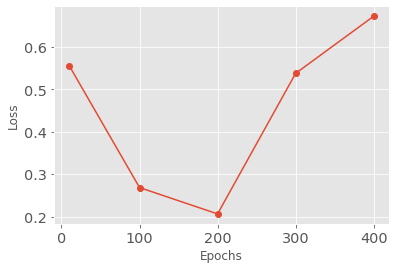

In [20]:
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(epochs_options, test_losses, marker='o')
plt.show()

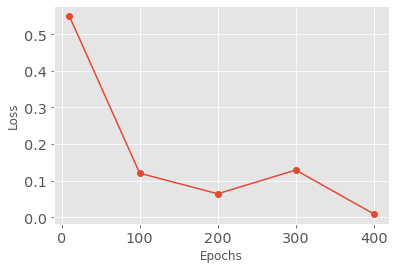

In [21]:
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(epochs_options, train_losses, marker='o')
plt.show()

In [22]:
def get_model(input_dim, hidden_units=[100]):
    """Create a Keras model with layers.

    Args:
      input_dim: (int) The shape of an item in a batch.
      labels_dim: (int) The shape of a label.
      hidden_units: [int] the layer sizes of the DNN (input layer first)

    Returns:
      A Keras model.
    """

    inputs = tf.keras.Input(shape=(input_dim,))
    x = inputs

    for units in hidden_units:
        x = tf.keras.layers.Dense(units, activation='relu')(x)
    outputs = tf.keras.layers.Dense(labels_dim, activation='softmax')(x)

    model = tf.keras.Model(inputs, outputs)

    return model

In [23]:
epochs = 100
num_nodes_options = [1, 2, 4, 8, 16, 32]
num_layers = 7
labels_dim = 12
train_evals = []
test_evals = []
for n in num_nodes_options:
    layers = [n] * num_layers
    model = get_model(561, layers)
    model.compile(optimizer=tf.keras.optimizers.RMSprop(),
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                  metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])
    model.fit(train_dataset, epochs=epochs)
    train_evals.append(model.evaluate(train_dataset))
    test_evals.append(model.evaluate(test_dataset))

Epoch 1/100
110/110 [==============================] - 1s 9ms/step - loss: 2.4348 - sparse_categorical_accuracy: 0.1769
Epoch 2/100
110/110 [==============================] - 0s 2ms/step - loss: 2.3553 - sparse_categorical_accuracy: 0.1841
Epoch 3/100
110/110 [==============================] - 0s 2ms/step - loss: 2.2870 - sparse_categorical_accuracy: 0.1841
Epoch 4/100
110/110 [==============================] - 0s 2ms/step - loss: 2.2287 - sparse_categorical_accuracy: 0.1841
Epoch 5/100
110/110 [==============================] - 0s 2ms/step - loss: 2.1797 - sparse_categorical_accuracy: 0.1841
Epoch 6/100
110/110 [==============================] - 0s 3ms/step - loss: 2.1390 - sparse_categorical_accuracy: 0.1841
Epoch 7/100
110/110 [==============================] - 0s 2ms/step - loss: 2.1055 - sparse_categorical_accuracy: 0.1841
Epoch 8/100
110/110 [==============================] - 0s 2ms/step - loss: 2.0783 - sparse_categorical_accuracy: 0.1841
Epoch 9/100
110/110 [===================

110/110 [==============================] - 0s 3ms/step - loss: 1.9733 - sparse_categorical_accuracy: 0.1828
Epoch 69/100
110/110 [==============================] - 0s 2ms/step - loss: 1.9733 - sparse_categorical_accuracy: 0.1828
Epoch 70/100
110/110 [==============================] - 0s 2ms/step - loss: 1.9733 - sparse_categorical_accuracy: 0.1828
Epoch 71/100
110/110 [==============================] - 0s 2ms/step - loss: 1.9733 - sparse_categorical_accuracy: 0.1828
Epoch 72/100
110/110 [==============================] - 0s 2ms/step - loss: 1.9733 - sparse_categorical_accuracy: 0.1828
Epoch 73/100
110/110 [==============================] - 0s 2ms/step - loss: 1.9733 - sparse_categorical_accuracy: 0.1828
Epoch 74/100
110/110 [==============================] - 0s 2ms/step - loss: 1.9733 - sparse_categorical_accuracy: 0.1828
Epoch 75/100
110/110 [==============================] - 0s 2ms/step - loss: 1.9733 - sparse_categorical_accuracy: 0.1828
Epoch 76/100
110/110 [=======================

110/110 [==============================] - 0s 3ms/step - loss: 1.9735 - sparse_categorical_accuracy: 0.1841
Epoch 35/100
110/110 [==============================] - 0s 3ms/step - loss: 1.9734 - sparse_categorical_accuracy: 0.1841
Epoch 36/100
110/110 [==============================] - 0s 3ms/step - loss: 1.9734 - sparse_categorical_accuracy: 0.1841
Epoch 37/100
110/110 [==============================] - 0s 3ms/step - loss: 1.9733 - sparse_categorical_accuracy: 0.1841
Epoch 38/100
110/110 [==============================] - 0s 2ms/step - loss: 1.9733 - sparse_categorical_accuracy: 0.1841
Epoch 39/100
110/110 [==============================] - 0s 3ms/step - loss: 1.9733 - sparse_categorical_accuracy: 0.1841
Epoch 40/100
110/110 [==============================] - 0s 3ms/step - loss: 1.9733 - sparse_categorical_accuracy: 0.1841
Epoch 41/100
110/110 [==============================] - 0s 2ms/step - loss: 1.9732 - sparse_categorical_accuracy: 0.1841
Epoch 42/100
110/110 [=======================

13/13 [==============================] - 0s 2ms/step - loss: 1.9553 - sparse_categorical_accuracy: 0.1765
Epoch 1/100
110/110 [==============================] - 1s 10ms/step - loss: 2.2072 - sparse_categorical_accuracy: 0.2229
Epoch 2/100
110/110 [==============================] - 0s 2ms/step - loss: 1.8396 - sparse_categorical_accuracy: 0.3271
Epoch 3/100
110/110 [==============================] - 0s 2ms/step - loss: 1.7383 - sparse_categorical_accuracy: 0.3314
Epoch 4/100
110/110 [==============================] - 0s 3ms/step - loss: 1.6681 - sparse_categorical_accuracy: 0.3333
Epoch 5/100
110/110 [==============================] - 0s 2ms/step - loss: 1.5983 - sparse_categorical_accuracy: 0.3367
Epoch 6/100
110/110 [==============================] - 0s 2ms/step - loss: 1.5270 - sparse_categorical_accuracy: 0.3410
Epoch 7/100
110/110 [==============================] - 0s 3ms/step - loss: 1.4593 - sparse_categorical_accuracy: 0.3526
Epoch 8/100
110/110 [==============================] 

110/110 [==============================] - 0s 3ms/step - loss: 0.8841 - sparse_categorical_accuracy: 0.5910
Epoch 68/100
110/110 [==============================] - 0s 2ms/step - loss: 0.8832 - sparse_categorical_accuracy: 0.5909
Epoch 69/100
110/110 [==============================] - 0s 2ms/step - loss: 0.8807 - sparse_categorical_accuracy: 0.5899
Epoch 70/100
110/110 [==============================] - 0s 3ms/step - loss: 0.8776 - sparse_categorical_accuracy: 0.5935
Epoch 71/100
110/110 [==============================] - 0s 2ms/step - loss: 0.8762 - sparse_categorical_accuracy: 0.5942
Epoch 72/100
110/110 [==============================] - 0s 3ms/step - loss: 0.8771 - sparse_categorical_accuracy: 0.5918
Epoch 73/100
110/110 [==============================] - 0s 3ms/step - loss: 0.8744 - sparse_categorical_accuracy: 0.5953
Epoch 74/100
110/110 [==============================] - 0s 3ms/step - loss: 0.8717 - sparse_categorical_accuracy: 0.5959
Epoch 75/100
110/110 [=======================

110/110 [==============================] - 0s 3ms/step - loss: 0.2723 - sparse_categorical_accuracy: 0.9030
Epoch 34/100
110/110 [==============================] - 0s 3ms/step - loss: 0.2706 - sparse_categorical_accuracy: 0.9080
Epoch 35/100
110/110 [==============================] - 0s 3ms/step - loss: 0.2604 - sparse_categorical_accuracy: 0.9095
Epoch 36/100
110/110 [==============================] - 0s 2ms/step - loss: 0.2488 - sparse_categorical_accuracy: 0.9143
Epoch 37/100
110/110 [==============================] - 0s 3ms/step - loss: 0.2478 - sparse_categorical_accuracy: 0.9145
Epoch 38/100
110/110 [==============================] - 0s 3ms/step - loss: 0.2421 - sparse_categorical_accuracy: 0.9168
Epoch 39/100
110/110 [==============================] - 0s 3ms/step - loss: 0.2340 - sparse_categorical_accuracy: 0.9180
Epoch 40/100
110/110 [==============================] - 0s 3ms/step - loss: 0.2292 - sparse_categorical_accuracy: 0.9190
Epoch 41/100
110/110 [=======================

13/13 [==============================] - 0s 1ms/step - loss: 0.1511 - sparse_categorical_accuracy: 0.9317
Epoch 1/100
110/110 [==============================] - 1s 10ms/step - loss: 1.6573 - sparse_categorical_accuracy: 0.3454
Epoch 2/100
110/110 [==============================] - 0s 3ms/step - loss: 0.9982 - sparse_categorical_accuracy: 0.5933
Epoch 3/100
110/110 [==============================] - 0s 3ms/step - loss: 0.7003 - sparse_categorical_accuracy: 0.7561
Epoch 4/100
110/110 [==============================] - 0s 3ms/step - loss: 0.5399 - sparse_categorical_accuracy: 0.8003
Epoch 5/100
110/110 [==============================] - 0s 3ms/step - loss: 0.4518 - sparse_categorical_accuracy: 0.8255
Epoch 6/100
110/110 [==============================] - 0s 3ms/step - loss: 0.3888 - sparse_categorical_accuracy: 0.8512
Epoch 7/100
110/110 [==============================] - 0s 3ms/step - loss: 0.3440 - sparse_categorical_accuracy: 0.8654
Epoch 8/100
110/110 [==============================] 

110/110 [==============================] - 0s 3ms/step - loss: 0.0752 - sparse_categorical_accuracy: 0.9694
Epoch 67/100
110/110 [==============================] - 0s 3ms/step - loss: 0.0768 - sparse_categorical_accuracy: 0.9698
Epoch 68/100
110/110 [==============================] - 0s 3ms/step - loss: 0.0726 - sparse_categorical_accuracy: 0.9721
Epoch 69/100
110/110 [==============================] - 0s 3ms/step - loss: 0.0754 - sparse_categorical_accuracy: 0.9734
Epoch 70/100
110/110 [==============================] - 0s 3ms/step - loss: 0.0756 - sparse_categorical_accuracy: 0.9708
Epoch 71/100
110/110 [==============================] - 0s 3ms/step - loss: 0.0747 - sparse_categorical_accuracy: 0.9720
Epoch 72/100
110/110 [==============================] - 0s 3ms/step - loss: 0.0735 - sparse_categorical_accuracy: 0.9744
Epoch 73/100
110/110 [==============================] - 0s 3ms/step - loss: 0.0685 - sparse_categorical_accuracy: 0.9763
Epoch 74/100
110/110 [=======================

110/110 [==============================] - 0s 4ms/step - loss: 0.0918 - sparse_categorical_accuracy: 0.9654
Epoch 33/100
110/110 [==============================] - 0s 4ms/step - loss: 0.0876 - sparse_categorical_accuracy: 0.9650
Epoch 34/100
110/110 [==============================] - 0s 3ms/step - loss: 0.0841 - sparse_categorical_accuracy: 0.9675
Epoch 35/100
110/110 [==============================] - 0s 3ms/step - loss: 0.0866 - sparse_categorical_accuracy: 0.9665
Epoch 36/100
110/110 [==============================] - 0s 3ms/step - loss: 0.0774 - sparse_categorical_accuracy: 0.9702
Epoch 37/100
110/110 [==============================] - 0s 3ms/step - loss: 0.0770 - sparse_categorical_accuracy: 0.9692
Epoch 38/100
110/110 [==============================] - 0s 3ms/step - loss: 0.0833 - sparse_categorical_accuracy: 0.9697
Epoch 39/100
110/110 [==============================] - 0s 3ms/step - loss: 0.0748 - sparse_categorical_accuracy: 0.9731
Epoch 40/100
110/110 [=======================

110/110 [==============================] - 0s 3ms/step - loss: 0.0336 - sparse_categorical_accuracy: 0.9887
Epoch 100/100
13/13 [==============================] - 0s 2ms/step - loss: 0.5158 - sparse_categorical_accuracy: 0.9291


In [24]:
train_losses = list(map(lambda eval: eval[0], train_evals))
test_losses = list(map(lambda eval: eval[0], test_evals))

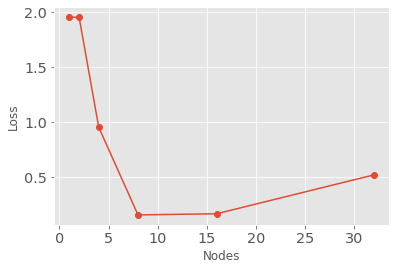

In [25]:
plt.xlabel("Nodes")
plt.ylabel("Loss")
plt.plot(num_nodes_options, test_losses, marker='o')
plt.show()

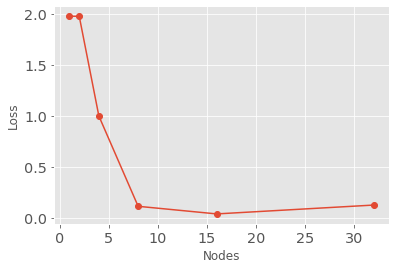

In [26]:
plt.xlabel("Nodes")
plt.ylabel("Loss")
plt.plot(num_nodes_options, train_losses, marker='o')
plt.show()

In [31]:
num_layer_options = [1, 2, 4, 8, 16]
num_nodes_in_layer = 8
labels_dim = 12
train_evals = []
test_evals = []
for T in num_layer_options:
    layers = [num_nodes_in_layer] * (T-1)
    model = get_model(561, layers)
    model.compile(optimizer=tf.keras.optimizers.RMSprop(),
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                  metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])
    model.fit(train_dataset, epochs=epochs)
    train_evals.append(model.evaluate(train_dataset))
    test_evals.append(model.evaluate(test_dataset))

Epoch 1/100
110/110 [==============================] - 0s 4ms/step - loss: 1.0275 - sparse_categorical_accuracy: 0.6842
Epoch 2/100
110/110 [==============================] - 0s 2ms/step - loss: 0.5240 - sparse_categorical_accuracy: 0.8504
Epoch 3/100
110/110 [==============================] - 0s 3ms/step - loss: 0.3710 - sparse_categorical_accuracy: 0.8897
Epoch 4/100
110/110 [==============================] - 0s 2ms/step - loss: 0.2956 - sparse_categorical_accuracy: 0.9070
Epoch 5/100
110/110 [==============================] - 0s 2ms/step - loss: 0.2500 - sparse_categorical_accuracy: 0.9190
Epoch 6/100
110/110 [==============================] - 0s 2ms/step - loss: 0.2191 - sparse_categorical_accuracy: 0.9315
Epoch 7/100
110/110 [==============================] - 0s 2ms/step - loss: 0.1966 - sparse_categorical_accuracy: 0.9373
Epoch 8/100
110/110 [==============================] - 0s 2ms/step - loss: 0.1793 - sparse_categorical_accuracy: 0.9439
Epoch 9/100
110/110 [===================

110/110 [==============================] - 0s 3ms/step - loss: 0.0502 - sparse_categorical_accuracy: 0.9838
Epoch 69/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0498 - sparse_categorical_accuracy: 0.9838
Epoch 70/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0494 - sparse_categorical_accuracy: 0.9840
Epoch 71/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0490 - sparse_categorical_accuracy: 0.9840
Epoch 72/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0486 - sparse_categorical_accuracy: 0.9840
Epoch 73/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0483 - sparse_categorical_accuracy: 0.9840
Epoch 74/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0479 - sparse_categorical_accuracy: 0.9841
Epoch 75/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0476 - sparse_categorical_accuracy: 0.9841
Epoch 76/100
110/110 [=======================

110/110 [==============================] - 0s 2ms/step - loss: 0.0838 - sparse_categorical_accuracy: 0.9725
Epoch 35/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0823 - sparse_categorical_accuracy: 0.9727
Epoch 36/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0804 - sparse_categorical_accuracy: 0.9738
Epoch 37/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0790 - sparse_categorical_accuracy: 0.9740
Epoch 38/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0776 - sparse_categorical_accuracy: 0.9740
Epoch 39/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0762 - sparse_categorical_accuracy: 0.9748
Epoch 40/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0750 - sparse_categorical_accuracy: 0.9757
Epoch 41/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0737 - sparse_categorical_accuracy: 0.9761
Epoch 42/100
110/110 [=======================

13/13 [==============================] - 0s 1ms/step - loss: 0.1310 - sparse_categorical_accuracy: 0.9601
Epoch 1/100
110/110 [==============================] - 1s 6ms/step - loss: 1.9093 - sparse_categorical_accuracy: 0.2683
Epoch 2/100
110/110 [==============================] - 0s 2ms/step - loss: 1.3130 - sparse_categorical_accuracy: 0.5654
Epoch 3/100
110/110 [==============================] - 0s 2ms/step - loss: 0.9754 - sparse_categorical_accuracy: 0.6835
Epoch 4/100
110/110 [==============================] - 0s 2ms/step - loss: 0.7440 - sparse_categorical_accuracy: 0.7498
Epoch 5/100
110/110 [==============================] - 0s 2ms/step - loss: 0.5952 - sparse_categorical_accuracy: 0.8102
Epoch 6/100
110/110 [==============================] - 0s 2ms/step - loss: 0.4906 - sparse_categorical_accuracy: 0.8455
Epoch 7/100
110/110 [==============================] - 0s 2ms/step - loss: 0.4174 - sparse_categorical_accuracy: 0.8665
Epoch 8/100
110/110 [==============================] -

110/110 [==============================] - 0s 2ms/step - loss: 0.0832 - sparse_categorical_accuracy: 0.9651
Epoch 68/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0822 - sparse_categorical_accuracy: 0.9660
Epoch 69/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0814 - sparse_categorical_accuracy: 0.9674
Epoch 70/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0808 - sparse_categorical_accuracy: 0.9675
Epoch 71/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0798 - sparse_categorical_accuracy: 0.9682
Epoch 72/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0798 - sparse_categorical_accuracy: 0.9674
Epoch 73/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0791 - sparse_categorical_accuracy: 0.9685
Epoch 74/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0782 - sparse_categorical_accuracy: 0.9690
Epoch 75/100
110/110 [=======================

110/110 [==============================] - 0s 2ms/step - loss: 0.1766 - sparse_categorical_accuracy: 0.9341
Epoch 34/100
110/110 [==============================] - 0s 2ms/step - loss: 0.1820 - sparse_categorical_accuracy: 0.9341
Epoch 35/100
110/110 [==============================] - 0s 2ms/step - loss: 0.1709 - sparse_categorical_accuracy: 0.9358
Epoch 36/100
110/110 [==============================] - 0s 2ms/step - loss: 0.1719 - sparse_categorical_accuracy: 0.9366
Epoch 37/100
110/110 [==============================] - 0s 2ms/step - loss: 0.1697 - sparse_categorical_accuracy: 0.9368
Epoch 38/100
110/110 [==============================] - 0s 2ms/step - loss: 0.1717 - sparse_categorical_accuracy: 0.9401
Epoch 39/100
110/110 [==============================] - 0s 2ms/step - loss: 0.1616 - sparse_categorical_accuracy: 0.9399
Epoch 40/100
110/110 [==============================] - 0s 2ms/step - loss: 0.1610 - sparse_categorical_accuracy: 0.9372
Epoch 41/100
110/110 [=======================

13/13 [==============================] - 0s 2ms/step - loss: 0.2131 - sparse_categorical_accuracy: 0.9227
Epoch 1/100
110/110 [==============================] - 2s 15ms/step - loss: 2.3313 - sparse_categorical_accuracy: 0.1825
Epoch 2/100
110/110 [==============================] - 0s 3ms/step - loss: 1.7762 - sparse_categorical_accuracy: 0.2110
Epoch 3/100
110/110 [==============================] - 0s 3ms/step - loss: 1.5435 - sparse_categorical_accuracy: 0.3881
Epoch 4/100
110/110 [==============================] - 0s 3ms/step - loss: 1.3819 - sparse_categorical_accuracy: 0.4104
Epoch 5/100
110/110 [==============================] - 0s 3ms/step - loss: 1.2593 - sparse_categorical_accuracy: 0.4158
Epoch 6/100
110/110 [==============================] - 0s 3ms/step - loss: 1.1595 - sparse_categorical_accuracy: 0.4287
Epoch 7/100
110/110 [==============================] - 0s 3ms/step - loss: 1.0889 - sparse_categorical_accuracy: 0.4567
Epoch 8/100
110/110 [==============================] 

110/110 [==============================] - 0s 3ms/step - loss: 0.1868 - sparse_categorical_accuracy: 0.9316
Epoch 67/100
110/110 [==============================] - 0s 3ms/step - loss: 0.1831 - sparse_categorical_accuracy: 0.9335
Epoch 68/100
110/110 [==============================] - 0s 3ms/step - loss: 0.1774 - sparse_categorical_accuracy: 0.9323
Epoch 69/100
110/110 [==============================] - 0s 3ms/step - loss: 0.1780 - sparse_categorical_accuracy: 0.9356
Epoch 70/100
110/110 [==============================] - 0s 3ms/step - loss: 0.1750 - sparse_categorical_accuracy: 0.9352
Epoch 71/100
110/110 [==============================] - 0s 3ms/step - loss: 0.1776 - sparse_categorical_accuracy: 0.9336
Epoch 72/100
110/110 [==============================] - 0s 3ms/step - loss: 0.1821 - sparse_categorical_accuracy: 0.9348
Epoch 73/100
110/110 [==============================] - 0s 3ms/step - loss: 0.1687 - sparse_categorical_accuracy: 0.9372
Epoch 74/100
110/110 [=======================

In [32]:
train_losses = list(map(lambda eval: eval[0], train_evals))
test_losses = list(map(lambda eval: eval[0], test_evals))

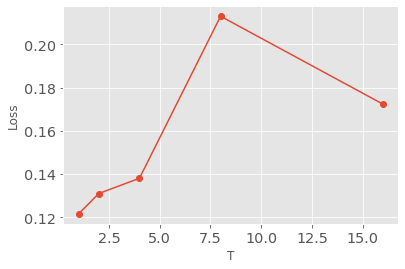

In [33]:
plt.xlabel("T")
plt.ylabel("Loss")
plt.plot(num_layer_options, test_losses, label="Test Losses", marker='o')
plt.show()

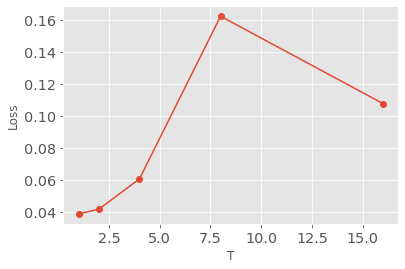

In [34]:
plt.xlabel("T")
plt.ylabel("Loss")
plt.plot(num_layer_options, train_losses, label="Train Losses", marker='o')
plt.show()